In [10]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
from astropy.io import fits
from astropy.nddata import Cutout2D
import astropy.units as u

In [11]:
data_dir = '/Users/abarnes/Dropbox/work/scratch/cmz_sfr/'
hdu_warm = fits.open('%s/luminosity_warm_conv36-v8-nonans_beam_stupidunits.fits' %data_dir)[0]
hdu_cold = fits.open('%s/luminosity_gc_no70_conv36_with4pi-stupidunits.fits' %data_dir)[0]

In [12]:
# CB added - distance correction! Original work assumed 8.5 kpc, but updated value is 8.1 kpc
# luminosity goes as distance^2, so to go from:
# L_assuming85 * (8100/8500)^2 = L_assuming81 
#(because L85 = constant * 8.5^2, constant = L85/8.5^2., L81 = constant * 8.1^2, so L81 = L85*(8.1/8.5)^2)
hdu_warm.data *= (8100/8500)**2
hdu_cold.data *= (8100/8500)**2

In [13]:
def get_cropdata(hdu, l, b, width, height):
    wcs = WCS(hdu.header)
    position = SkyCoord(l=l, b=b, frame='galactic', unit='deg')
    cutout = Cutout2D(hdu.data, position, [height, width], wcs=wcs)
    hdu_crop = fits.PrimaryHDU(cutout.data, cutout.wcs.to_header())
    return hdu_crop

hdu_warm_crop = get_cropdata(hdu_warm, 0*u.deg, 0*u.deg, 2*u.deg, 1*u.deg)
hdu_cold_crop = get_cropdata(hdu_cold, 0*u.deg, 0*u.deg, 2*u.deg, 1*u.deg)

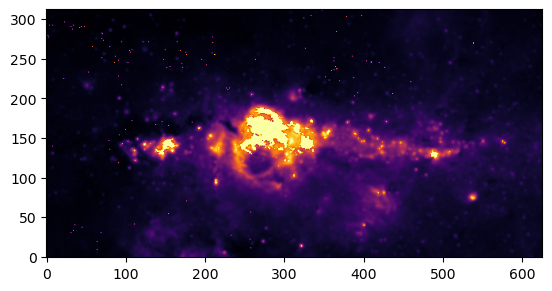

In [14]:
plt.imshow(hdu_warm_crop.data, origin='lower', cmap='inferno')

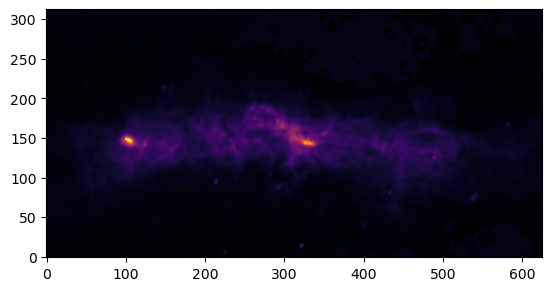

In [15]:
plt.imshow(hdu_cold_crop.data, origin='lower', cmap='inferno')

In [16]:
def get_sfr(Ltot, conv=4.5e-44 * u.s/u.erg*u.Msun/u.yr):
    SFR = conv * Ltot.to(u.erg/u.s).value
    return SFR.value

Lwarm = np.nansum(hdu_warm_crop.data) *u.Lsun
Lcold = np.nansum(hdu_cold_crop.data) *u.Lsun

SFRwarm = get_sfr(Lwarm)
SFRcold = get_sfr(Lcold)
SFRtot = get_sfr(Lwarm+Lcold)

print('Warm SFR: %0.3f Msun/yr' % SFRwarm)
print('Cold SFR: %0.3f Msun/yr' % SFRcold)
print('Total SFR: %0.3f Msun/yr' % SFRtot)

Warm SFR: 0.043 Msun/yr
Cold SFR: 0.047 Msun/yr
Total SFR: 0.090 Msun/yr
